<a href="https://colab.research.google.com/github/HelamaBoeira/data-sience/blob/main/NB_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Autor: Helamã da Silva Boeira 30/04/2022

In [ ]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Carrega o dataset com os dados para o treinamento e validacao
dados_cryo_treino = pd.read_csv("dados_cryotherapy.csv", encoding="utf-8")

In [ ]:
dados_cryo_treino.shape

(90, 7)

In [ ]:
dados_cryo_treino.head(20)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0
5,1,41,8,2,2,20,1
6,1,36,11,2,1,8,0
7,1,59,3,3,3,20,0
8,1,20,4,12,1,6,1
9,2,34,11,3,3,150,0


In [ ]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(dados_cryo_treino[['Sexo', 'Idade', 'Tempo', 'Numero_Verrugas', "Tipo", "Area"]])
#Definição do atributo de classificacao
data_classif = np.array(dados_cryo_treino['Resultado_Tratamento'])

In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dados, size=10):
    corr = dados.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

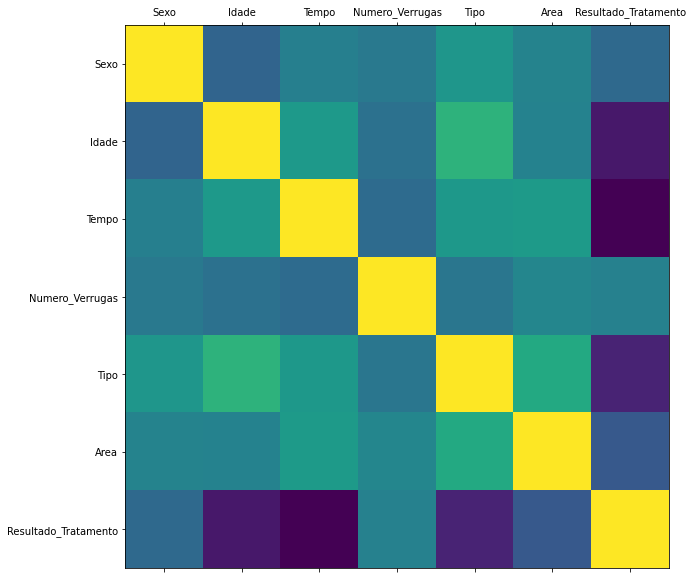

In [ ]:
# Criando o gráfico
plot_corr(dados_cryo_treino)

In [ ]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [ ]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  1  20   1   2   1  75]
 [  2  34  12   3   3  95]
 [  2  15   2   3   1   4]
 [  1  24  10  10   1  20]
 [  1  50   8  11   3 132]
 [  2  21  10   5   1  35]
 [  1  29   7   5   1  96]
 [  1  20   4   3   1   6]
 [  2  28   4  11   1 100]
 [  1  35   9   9   1 100]
 [  1  30   2   2   1 115]
 [  1  22   5   2   1  70]
 [  2  36  10   4   1   8]
 [  1  20   4  12   1   6]
 [  1  19   8   8   1 160]
 [  1  40  11   9   2  80]
 [  2  36  11   6   1   8]
 [  2  40   8   6   2  80]
 [  1  27  10   7   1   6]
 [  2  67  12  12   3  42]
 [  1  27  10   5   1   6]
 [  2  22   5   9   1  70]
 [  2  35  12   5   3 100]
 [  1  34  12   1   3 150]
 [  1  20   3  11   1  75]
 [  1  59   3   3   3  20]
 [  1  32  11   7   3 750]
 [  1  50   8   1   3 132]
 [  2  15   8  12   1  30]
 [  2  15   1  12   3  70]
 [  1  23  10   7   3  72]
 [  2  18   5   1   1  80]
 [  2  17   3   3   1  63]
 [  1  63   2   3   3  20]
 [  2  18   4   8   1  80]
 [  1  

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados_cryo_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(dados_cryo_treino.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [ ]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [ ]:
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8888888888888888
Na Base de Treinamento


In [ ]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.7407407407407407
na Base de Teste


In [ ]:
from sklearn import metrics

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[11  3]
 [ 4  9]]

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           0       0.75      0.69      0.72        13

    accuracy                           0.74        27
   macro avg       0.74      0.74      0.74        27
weighted avg       0.74      0.74      0.74        27



In [ ]:
import joblib

joblib.dump(modelo_NB, 'modelo_cryo_MNB.pkl')

['modelo_cryo_MNB.pkl']